In [12]:
#Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [16]:
import pandas as pd
df=pd.read_csv('/Users/ahmadkhalilghamai/Downloads/etc/updated_last5_stats.csv')
df.head()

,team,opponent,location,goals_for,goals_against,result,team_rating,opponent_rating,rating_diff,team_points,...,discipline_gap,attack_efficiency,is_win,last_5_wins,is_draw,is_loss,last_5_draws,last_5_losses,last_5_total,last_5_win_rate
0,1. FC Köln,VfB Stuttgart,1,0,2,-1,NaN,7.16,NaN,27,...,NaN,NaN,0,0.0,0,1,0.0,1.0,1.0,0.000000
1,1. FC Köln,Bayer Leverkusen,0,0,3,-1,NaN,7.46,NaN,27,...,NaN,NaN,0,0.0,0,1,0.0,2.0,2.0,0.000000
2,1. FC Köln,Borussia Mönchengladbach,1,3,1,1,NaN,6.81,NaN,27,...,NaN,NaN,1,1.0,0,0,0.0,2.0,3.0,0.333333
3,1. FC Köln,RB Leipzig,0,0,6,-1,NaN,7.08,NaN,27,...,NaN,NaN,0,1.0,0,1,0.0,3.0,4.0,0.250000
4,1. FC Köln,Augsburg,1,1,1,0,NaN,NaN,NaN,27,...,NaN,NaN,0,1.0,1,0,1.0,3.0,5.0,0.200000


## EDA Analysis

In [19]:
df.shape

(522, 41)

In [21]:
df.columns

Index(['team', 'opponent', 'location', 'goals_for', 'goals_against', 'result',
       'team_rating', 'opponent_rating', 'rating_diff', 'team_points',
       'opponent_points', 'points_diff', 'round', 'started', 'finished',
       'cancelled', 'goals_conceded_per_match', 'goals_conceded_per_match_opp',
       'interceptions_per_match', 'interceptions_per_match_opp',
       'shots_on_target_per_match', 'shots_on_target_per_match_opp',
       'penalties_conceded', 'penalties_conceded_opp', 'penalties_won',
       'penalties_won_opp', 'goals_per_match', 'goals_per_match_opp',
       'table_rank', 'table_rank_opp', 'defensive_pressure_ratio',
       'discipline_gap', 'attack_efficiency', 'is_win', 'last_5_wins',
       'is_draw', 'is_loss', 'last_5_draws', 'last_5_losses', 'last_5_total',
       'last_5_win_rate'],
      dtype='object')

In [25]:
df.dtypes

team                              object
opponent                          object
location                           int64
goals_for                          int64
goals_against                      int64
result                             int64
team_rating                      float64
opponent_rating                  float64
rating_diff                      float64
team_points                        int64
opponent_points                    int64
points_diff                        int64
round                              int64
started                             bool
finished                            bool
cancelled                           bool
goals_conceded_per_match         float64
goals_conceded_per_match_opp     float64
interceptions_per_match          float64
interceptions_per_match_opp      float64
shots_on_target_per_match        float64
shots_on_target_per_match_opp    float64
penalties_conceded               float64
penalties_conceded_opp           float64
penalties_won   

In [27]:
df.nunique()

team                              18
opponent                          18
location                           2
goals_for                          8
goals_against                      8
result                             3
team_rating                       12
opponent_rating                   12
rating_diff                       90
team_points                       15
opponent_points                   15
points_diff                      105
round                             29
started                            1
finished                           1
cancelled                          1
goals_conceded_per_match           7
goals_conceded_per_match_opp       7
interceptions_per_match           10
interceptions_per_match_opp       10
shots_on_target_per_match         11
shots_on_target_per_match_opp     11
penalties_conceded                 7
penalties_conceded_opp             7
penalties_won                      5
penalties_won_opp                  5
goals_per_match                   10
g

In [29]:
df.describe()

,location,goals_for,goals_against,result,team_rating,opponent_rating,rating_diff,team_points,opponent_points,points_diff,...,discipline_gap,attack_efficiency,is_win,last_5_wins,is_draw,is_loss,last_5_draws,last_5_losses,last_5_total,last_5_win_rate
count,522.00000,522.000000,522.000000,522.00000,348.000000,348.000000,2.280000e+02,522.00000,522.00000,522.000000,...,192.00000,348.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.50000,1.572797,1.572797,0.00000,6.964167,6.964167,-7.791039e-18,46.50000,46.50000,0.000000,...,0.00000,0.341201,0.363985,1.693487,0.272031,0.363985,1.268199,1.693487,4.655172,0.368678
std,0.50048,1.322864,1.322864,0.85403,0.222373,0.222373,3.291492e-01,18.22995,18.22995,26.381012,...,3.73185,0.051255,0.481606,1.264424,0.445432,0.481606,1.001393,1.154943,0.957776,0.277087
min,0.00000,0.000000,0.000000,-1.00000,6.670000,6.670000,-7.900000e-01,17.00000,17.00000,-73.000000,...,-8.00000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.00000,1.000000,1.000000,-1.00000,6.805000,6.805000,-2.225000e-01,34.00000,34.00000,-17.000000,...,-3.00000,0.329051,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.200000
50%,0.50000,1.000000,1.000000,0.00000,6.880000,6.880000,0.000000e+00,42.00000,42.00000,0.000000,...,0.00000,0.352990,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,5.000000,0.400000
75%,1.00000,2.000000,2.000000,1.00000,7.100000,7.100000,2.225000e-01,63.00000,63.00000,17.000000,...,3.00000,0.361081,1.000000,3.000000,1.000000,1.000000,2.000000,2.750000,5.000000,0.600000
max,1.00000,8.000000,8.000000,1.00000,7.460000,7.460000,7.900000e-01,90.00000,90.00000,73.000000,...,8.00000,0.428571,1.000000,5.000000,1.000000,1.000000,4.000000,5.000000,5.000000,1.000000


## Omiting unnecessary columns

In [107]:
df = df.drop(['started', 'finished','is_win','is_loss','is_draw', 'cancelled', 'rating_diff', 'points_diff', 'round', 'team', 'opponent','goals_for', 'goals_against'], axis=1)

## dealing with nulls

In [109]:
# Fill missing values with column mean
df = df.fillna(df.mean())

# Fill all numerical columns with their means
df.fillna(df.mean(numeric_only=True), inplace=True)

In [111]:
df.isnull().sum()

location                         0
result                           0
team_rating                      0
opponent_rating                  0
team_points                      0
opponent_points                  0
goals_conceded_per_match         0
goals_conceded_per_match_opp     0
interceptions_per_match          0
interceptions_per_match_opp      0
shots_on_target_per_match        0
shots_on_target_per_match_opp    0
penalties_conceded               0
penalties_conceded_opp           0
penalties_won                    0
penalties_won_opp                0
goals_per_match                  0
goals_per_match_opp              0
table_rank                       0
table_rank_opp                   0
defensive_pressure_ratio         0
discipline_gap                   0
attack_efficiency                0
last_5_wins                      0
last_5_draws                     0
last_5_losses                    0
last_5_total                     0
last_5_win_rate                  0
dtype: int64

## Target column class distribution

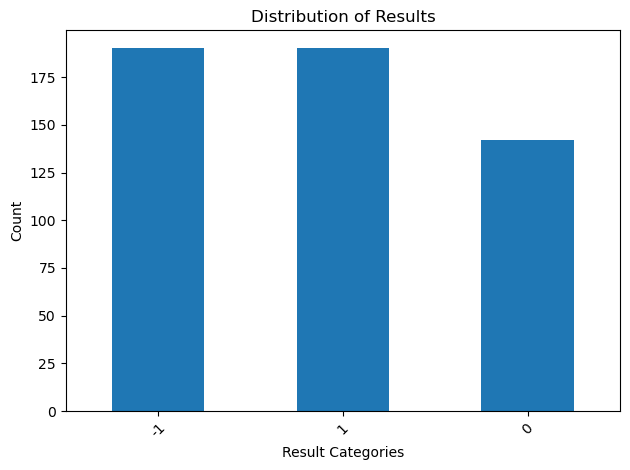

result


In [113]:
import matplotlib.pyplot as plt  # Add this import at the top

import matplotlib.pyplot as plt

# Your existing code with color fix
distribution = df["result"].value_counts()
distribution.plot(kind="bar", color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])

# Customize the plot
plt.title("Distribution of Results")
plt.xlabel("Result Categories")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()
print('result')


##  Splitting the data into features and target variable

In [115]:

# The original 'Date' column can't be used directly as a feature, as ML models require numerical input.
features= df.drop(columns =['result'])
target = df['result']

## Test/Train split

In [117]:

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Scaling

In [119]:
scaler = StandardScaler()

In [121]:
# Scaling the features 
X_train_scaled = scaler.fit_transform(X_train) # fit and transform in one step.
X_test_scaled = scaler.transform(X_test)

In [123]:

X_train_scal = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scal = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [125]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


## Logistic Classifier+SMOTE+GridSearch

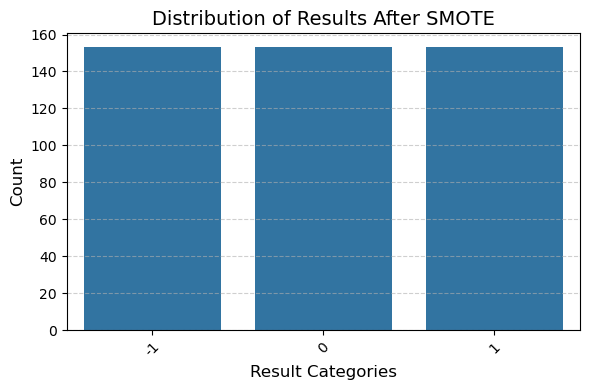

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

Best Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}

Classification Report:
               precision    recall  f1-score   support

          -1       0.75      0.73      0.74        37
           0       0.54      0.60      0.57        25
           1       0.80      0.77      0.79        43

    accuracy                           0.71       105
   macro avg       0.70      0.70      0.70       105
weighted avg       0.72      0.71      0.72       105



In [127]:
# Create pipeline


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Step 1: Split Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE separately for visualization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 3: Plot class distribution after SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled, color=plt.rcParams['axes.prop_cycle'].by_key()['color'][0])  # Default matplotlib blue

# Customize the plot
plt.title("Distribution of Results After SMOTE", fontsize=14)
plt.xlabel("Result Categories", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Step 4: Define Pipeline and GridSearch
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial'))
])

param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Step 5: Evaluate
y_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Decision Tree

In [128]:
from sklearn.tree import DecisionTreeClassifier

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'dt__max_depth': [3, 5, 10, None],
    'dt__min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

y_pred_dt = grid_search_dt.predict(X_test)
print("📌 Decision Tree - Best Parameters:", grid_search_dt.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


📌 Decision Tree - Best Parameters: {'dt__max_depth': 3, 'dt__min_samples_split': 2}

Classification Report:
               precision    recall  f1-score   support

          -1       0.60      0.78      0.68        37
           0       0.59      0.52      0.55        25
           1       0.74      0.60      0.67        43

    accuracy                           0.65       105
   macro avg       0.65      0.64      0.63       105
weighted avg       0.66      0.65      0.65       105



## KNN Model

In [131]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

y_pred_knn = grid_search_knn.predict(X_test)
print("📌 KNN - Best Parameters:", grid_search_knn.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


📌 KNN - Best Parameters: {'knn__n_neighbors': 9, 'knn__weights': 'distance'}

Classification Report:
               precision    recall  f1-score   support

          -1       0.64      0.62      0.63        37
           0       0.44      0.60      0.51        25
           1       0.74      0.60      0.67        43

    accuracy                           0.61       105
   macro avg       0.61      0.61      0.60       105
weighted avg       0.63      0.61      0.62       105



## Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [5, 10, None],
    'rf__min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

y_pred_rf = grid_search_rf.predict(X_test)
print("📌 Random Forest - Best Parameters:", grid_search_rf.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


📌 Random Forest - Best Parameters: {'rf__max_depth': 5, 'rf__min_samples_split': 5, 'rf__n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

          -1       0.69      0.68      0.68        37
           0       0.50      0.60      0.55        25
           1       0.74      0.67      0.71        43

    accuracy                           0.66       105
   macro avg       0.65      0.65      0.65       105
weighted avg       0.67      0.66      0.66       105



## Ada Boost 

In [135]:
from sklearn.ensemble import AdaBoostClassifier

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
])

param_grid_ada = {
    'ada__n_estimators': [50, 100, 200],
    'ada__learning_rate': [0.5, 1.0, 1.5]
}

grid_search_ada = GridSearchCV(pipeline_ada, param_grid_ada, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_ada.fit(X_train, y_train)

y_pred_ada = grid_search_ada.predict(X_test)
print("📌 AdaBoost - Best Parameters:", grid_search_ada.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/ana

📌 AdaBoost - Best Parameters: {'ada__learning_rate': 0.5, 'ada__n_estimators': 50}

Classification Report:
               precision    recall  f1-score   support

          -1       0.73      0.51      0.60        37
           0       0.44      0.76      0.56        25
           1       0.67      0.56      0.61        43

    accuracy                           0.59       105
   macro avg       0.61      0.61      0.59       105
weighted avg       0.64      0.59      0.59       105



/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


## Models Camprision

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# --------------------- Logistic Regression ---------------------
pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial'))
])
param_logreg = {'logreg__C': [0.01, 0.1, 1], 'logreg__penalty': ['l2']}
grid_logreg = GridSearchCV(pipe_logreg, param_logreg, cv=5, scoring='f1_macro', n_jobs=-1)
grid_logreg.fit(X_train, y_train)
y_pred_logreg = grid_logreg.predict(X_test)

# --------------------- AdaBoost ---------------------
pipe_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('ada', AdaBoostClassifier(random_state=42))
])
param_ada = {'ada__n_estimators': [50, 100], 'ada__learning_rate': [0.5, 1.0]}
grid_ada = GridSearchCV(pipe_ada, param_ada, cv=5, scoring='f1_macro', n_jobs=-1)
grid_ada.fit(X_train, y_train)
y_pred_ada = grid_ada.predict(X_test)

# --------------------- KNN ---------------------
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])
param_knn = {'knn__n_neighbors': [3, 5, 7]}
grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, scoring='f1_macro', n_jobs=-1)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)

# --------------------- Random Forest ---------------------
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])
param_rf = {'rf__n_estimators': [100], 'rf__max_depth': [5, 10]}
grid_rf = GridSearchCV(pipe_rf, param_rf, cv=5, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)

# --------------------- Decision Tree ---------------------
pipe_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
])
param_dt = {'dt__max_depth': [3, 5, 10]}
grid_dt = GridSearchCV(pipe_dt, param_dt, cv=5, scoring='f1_macro', n_jobs=-1)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)

# --------------------- Model Comparison ---------------------
model_predictions = {
    'Logistic Regression': y_pred_logreg,
    'AdaBoost': y_pred_ada,
    'KNN': y_pred_knn,
    'Random Forest': y_pred_rf,
    'Decision Tree': y_pred_dt
}

results = []
for model_name, y_pred in model_predictions.items():
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (macro)': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall (macro)': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1 Score (macro)': f1_score(y_test, y_pred, average='macro', zero_division=0)
    })

comparison_df = pd.DataFrame(results)
print("📊 Model Comparison:\n")
print(comparison_df.sort_values(by='F1 Score (macro)', ascending=False).reset_index(drop=True))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in ve

📊 Model Comparison:

                 Model  Accuracy  Precision (macro)  Recall (macro)  \
0  Logistic Regression  0.714286           0.696864        0.699057   
1                  KNN  0.676190           0.671217        0.669860   
2        Decision Tree  0.647619           0.645978        0.636145   
3        Random Forest  0.638095           0.627498        0.627689   
4             AdaBoost  0.590476           0.613099        0.610551   

   F1 Score (macro)  
0          0.697159  
1          0.664506  
2          0.634070  
3          0.624951  
4          0.589864  


In [139]:
comparison_df

,Model,Accuracy,Precision (macro),Recall (macro),F1 Score (macro)
0,Logistic Regression,0.714286,0.696864,0.699057,0.697159
1,AdaBoost,0.590476,0.613099,0.610551,0.589864
2,KNN,0.676190,0.671217,0.669860,0.664506
3,Random Forest,0.638095,0.627498,0.627689,0.624951
4,Decision Tree,0.647619,0.645978,0.636145,0.634070


## confusion Matrix

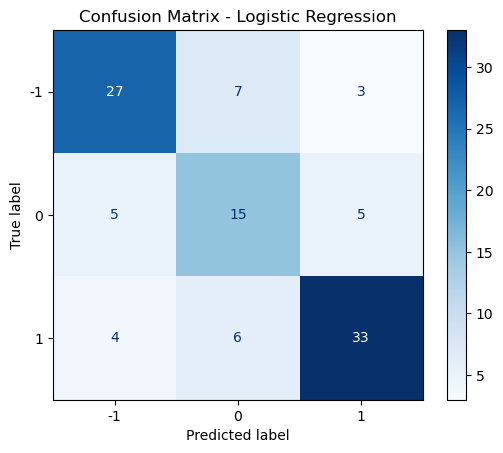

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=grid_logreg.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()